# Лабораторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0, dtype = {"num_dependents" : "object"})

# 1 Вопрос

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         502 non-null    object 
 1   duration                502 non-null    float64
 2   credit_history          502 non-null    object 
 3   purpose                 502 non-null    object 
 4   credit_amount           502 non-null    float64
 5   savings_status          502 non-null    object 
 6   employment              502 non-null    object 
 7   installment_commitment  502 non-null    float64
 8   other_parties           502 non-null    object 
 9   property_magnitude      502 non-null    object 
 10  age                     502 non-null    float64
 11  other_payment_plans     502 non-null    object 
 12  housing                 502 non-null    object 
 13  existing_credits        502 non-null    float64
 14  job                     502 non-null    ob

# 2 Вопрос

#### Укажите признак с наименьшей дисперсией: installment_commitment

In [4]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits
count,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420
std,12.748,2822.553,1.106,11.274,0.586
min,-1.000,250.000,1.000,19.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000
max,72.000,18424.000,4.000,75.000,4.000


# 3 Вопрос

#### В каком классе больше всего skilled работников: в классе good

In [32]:
abs(credit_df[credit_df["class"] == "bad"].mean() - credit_df[credit_df["class"] == "good"].mean())

duration                    4.982
credit_amount             573.110
installment_commitment      0.103
age                         3.304
existing_credits            0.099
dtype: float64

#### Среднее какого признака отличается для двух классов сильнее всего: credit_amount

# 4 Вопрос

In [19]:
credit_df[(credit_df["class"] == "bad") & (credit_df["job"] == "skilled")].shape[0]

107

In [20]:
credit_df[(credit_df["class"] == "good") & (credit_df["job"] == "skilled")].shape[0]

213

# 5 Вопрос

#### Есть ли в наборе признаки с выбросами? Какие? Да: credit_amount, duration, age, existing_credits

In [3]:
normal_df = credit_df

In [4]:
min_max_scaler = MinMaxScaler()
normal_df[["duration", "credit_amount", "installment_commitment", "age", "existing_credits"]] = min_max_scaler.fit_transform(normal_df[["duration", "credit_amount", "installment_commitment", "age", "existing_credits"]])

<AxesSubplot:>

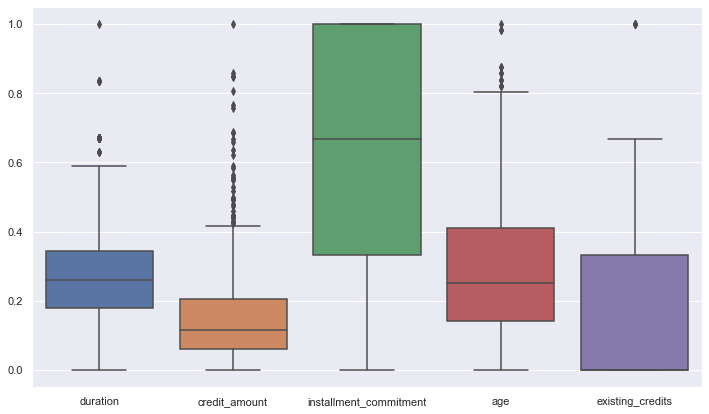

In [5]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=normal_df)

In [3]:
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good


# 6 Вопрос

#### Сколько пропущенных значений в наборе? 395

In [8]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits
count,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420
std,12.748,2822.553,1.106,11.274,0.586
min,-1.000,250.000,1.000,19.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000
max,72.000,18424.000,4.000,75.000,4.000


In [15]:
(credit_df['duration'] < 0).sum()

27

In [27]:
credit_df['checking_status'].unique()

array(['0<=X<200', '>=200', '<0', 'no checking'], dtype=object)

In [25]:
(credit_df['checking_status'] == 'no checking').sum()

197

In [31]:
credit_df['savings_status'].unique()

array(['<100', '100<=X<500', 'no known savings', '500<=X<1000', '>=1000'],
      dtype=object)

In [34]:
(credit_df['savings_status'] == 'no known savings').sum()

95

In [42]:
credit_df['property_magnitude'].unique()

array(['real estate', 'car', 'life insurance', 'no known property'],
      dtype=object)

In [9]:
(credit_df['property_magnitude'] == 'no known property').sum()

76

In [10]:
(credit_df['duration'] < 0).sum() \
+ (credit_df['checking_status'] == 'no checking').sum() \
+ (credit_df['savings_status'] == 'no known savings').sum() \
+ (credit_df['property_magnitude'] == 'no known property').sum()

395